In [7]:
import pandas as pd

file_path = '/Users/hananalaskar/Documents/Code for Girls/data-science/ds-master/' 
df = pd.read_csv(file_path+'data_set/ds_salaries.csv')

df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [8]:
# To remove a column
df.drop(columns= df.columns[0], axis=1, inplace = True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [9]:
## Bin salary_in_usd

In [10]:
df['salary_in_usd']

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64

In [11]:
df['salary_in_usd'].min()

2859

In [12]:
df['salary_in_usd'].max()

600000

In [13]:
df['salary_in_usd'].median()

101570.0

# remove outliers

In [14]:
q_1 = df["salary_in_usd"].quantile(0.25)
q_3 = df["salary_in_usd"].quantile(0.75)
iqr = q_3 - q_1


In [15]:
h_q = q_1 + (1.5 * iqr)
df[df["salary_in_usd"] >= h_q]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
37,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,US,50,US,L
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
576,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M


In [16]:
l_q = q_1 - (1.5 * iqr)
df[df["salary_in_usd"] <= l_q]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [17]:
df = df[(df["salary_in_usd"] > l_q) & (df["salary_in_usd"] < h_q) ]

In [22]:
df['salary_in_usd_bin'] = pd.cut(df['salary_in_usd'], 
                                     labels=['extremely low', 'low', 'medium', 'high', 'extremely high'], 
#                                   bins=[0, 250, 5000, 10000,  13000, 15000]

                                     bins=[0, 25000, 50000, 100000, 150000, 200000]

                        )

df[['salary_in_usd', 'salary_in_usd_bin']]

<ipython-input-22-eebf54441d55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_in_usd_bin'] = pd.cut(df['salary_in_usd'],


,salary_in_usd,salary_in_usd_bin
0,79833,medium
2,109024,high
3,20000,extremely low
4,150000,high
5,72000,medium
...,...,...
601,52000,medium
602,154000,extremely high
603,126000,high
604,129000,high


In [23]:
df[['salary_in_usd_bin']].value_counts()

salary_in_usd_bin
medium               195
high                 158
extremely high        81
low                   61
extremely low         46
dtype: int64

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='[salary_in_usd_bin]'>

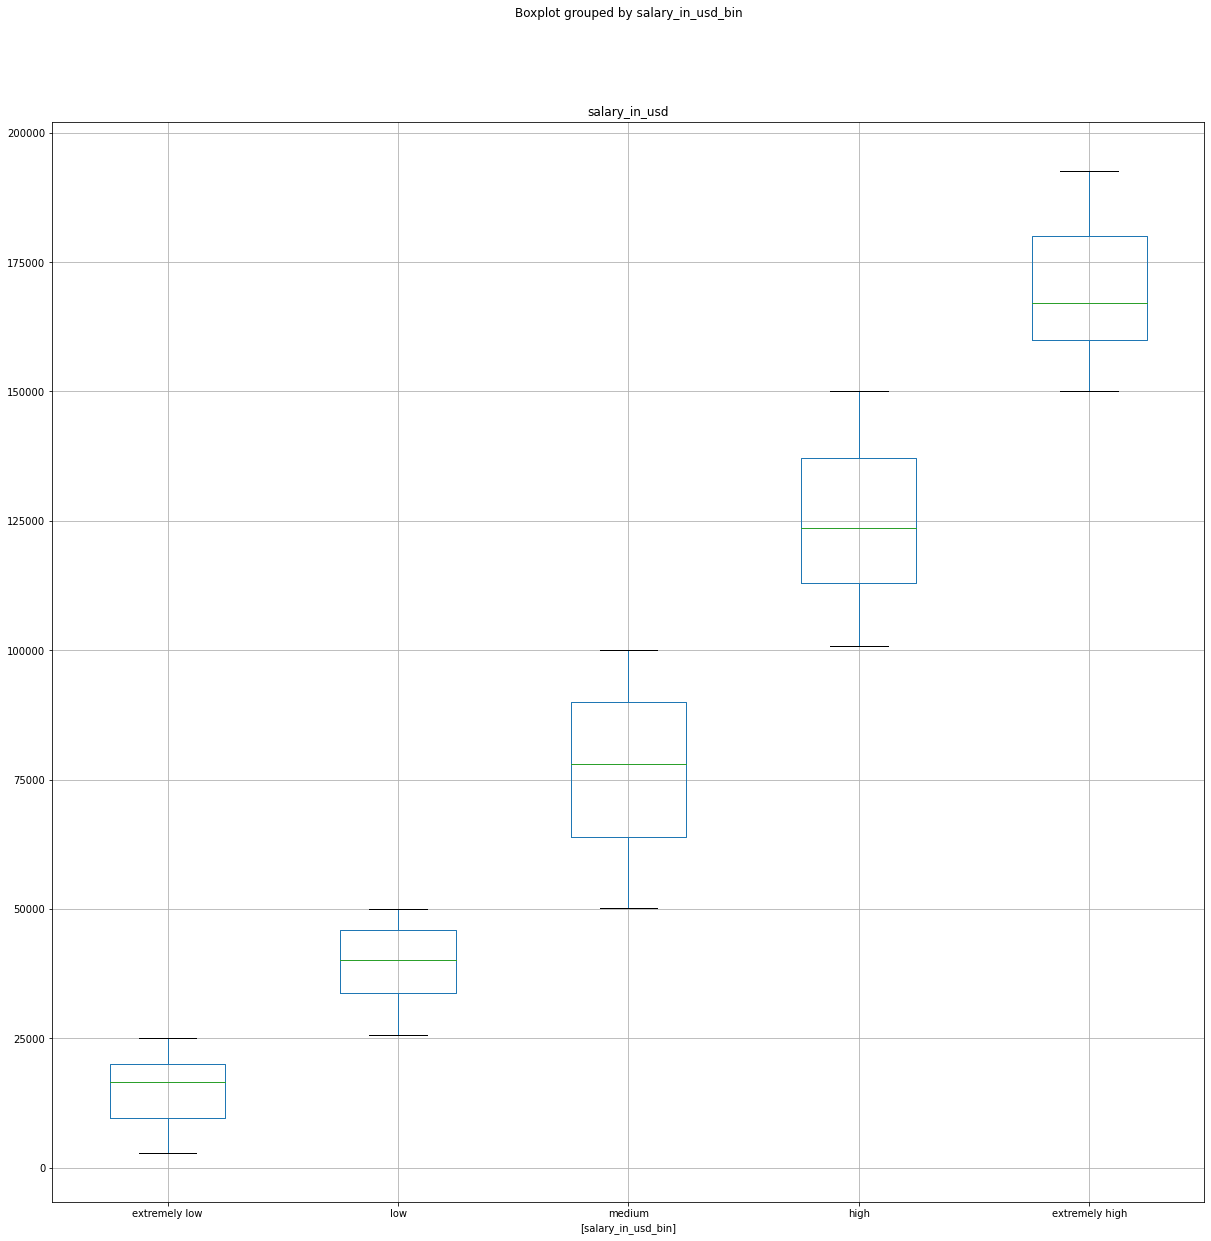

In [24]:
df.boxplot(column=['salary_in_usd'], by=['salary_in_usd_bin'], figsize=(20, 20))  